## Multi-Layer Perception:

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the Dataset
tip= sns.load_dataset('tips')

# Preprocessing
# Convert categorical variables to dummy variables
tip= pd.get_dummies(tip, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X= tip.drop('tip', axis=1)
y=tip['tip']

# Splitting the dataset_
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=20, random_state=42)

# Scale the data
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Building the model
model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                          input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), #Hidden layer
    tf.keras.layers.Dense(1) # Output layer for regression 
])

# Compile the model
model.compile(optimizer='adam', loss= 'mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Square Error)
loss= model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error:', loss[0])

c:\Users\Summaiya\AppData\Local\miniconda3\envs\dl_env\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 10.1380 - mae: 2.8410
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.8961 - mae: 2.4062 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.9679 - mae: 1.9741
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.2994 - mae: 1.5799
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.1110 - mae: 1.2744 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.2101 - mae: 1.0654
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.8008 - mae: 0.9818
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.5625 - mae: 0.9404
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.4160 - mae: 0.9015
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.3011 - mae: 0.8676
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2152 - mae: 0.8388
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1539 - mae: 0.8110
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/

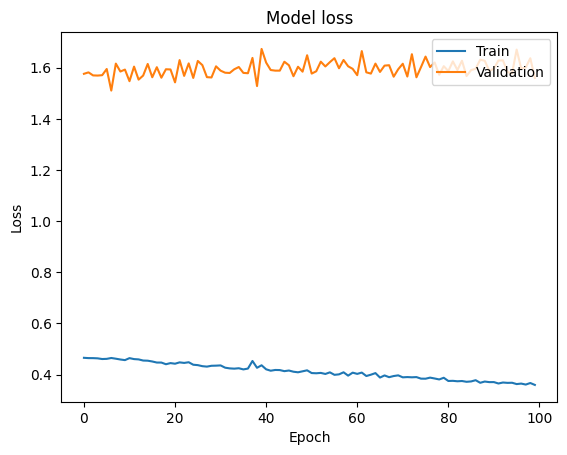

In [3]:
# Train the model and plot the training and testing loss and accuracy
history= model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss= model.evaluate(X_test, y_test, verbose=0)

#  Plot the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Assignment: What's Validation Set? or validation loss?
# Assignment simple nn ka b plot bnana hai